## HW2: Linear Discriminant Analysis
In hw2, you need to implement [Fisher’s linear discriminant](https://towardsdatascience.com/fishers-linear-discriminant-intuitively-explained-52a1ba79e1bb) by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get **zero point** by simply calling `sklearn.discriminant_analysis.LinearDiscriminantAnalysis` 

## Load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np

In [ ]:
x_train, x_test, y_train, y_test = np.load('/content/drive/MyDrive/ML/HW2/classification_data.npy', allow_pickle=True)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3750, 2)
(3750,)
(1250, 2)
(1250,)


In [ ]:
# def _init():
# x_train1 = np.empty(x_train.shape) 
# x_train2 = np.empty(x_train.shape)
x_train1 = x_train
x_train2 = x_train
for i in reversed(range(len(x_train))): # classification
  if y_train[i] == 0:
    x_train2 = np.delete(x_train2, i, 0) 
  if y_train[i] == 1:
    x_train1 = np.delete(x_train1, i, 0) 
# print(x_train1)
# print(x_train2)
# for i in range (3750):
#   if x_train1[i] != x_train[i][0]:
#     print("1 false")
#   if x_train2[i] != x_train[i][1]:
#     print("2 false")

## 1. Compute the mean vectors mi, (i=1,2) of each 2 classes

In [ ]:
## Your code HERE
# n = len(x_train)
m1 = np.mean(x_train1, axis = 0) # mean
m2 = np.mean(x_train2, axis = 0) # mean

In [ ]:
print(f"mean vector of class 1: {m1}")
print(f"mean vector of class 2: {m2}")

mean vector of class 1: [ 0.99253136 -0.99115481]
mean vector of class 2: [-0.9888012   1.00522778]


## 2. Compute the Within-class scatter matrix SW

In [ ]:
# Your code HERE
s1 = np.array([[0.0, 0.0], [0.0, 0.0]])
# print(s1.shape)
for i in range(len(x_train1)):
  temp = np.array([x_train1[i] - m1])
  s1 += temp.T @ temp
# print(s1)
s2 = np.array([[0.0, 0.0], [0.0, 0.0]])
for i in range(len(x_train2)):
  temp = np.array([x_train2[i] - m2])
  s2 += temp.T @ temp
# print(s2)
sw = s1 + s2

In [ ]:
print(f"Within-class scatter matrix SW:")
print(sw)

Within-class scatter matrix SW:
[[ 4337.38546493 -1795.55656547]
 [-1795.55656547  2834.75834886]]


## 3.  Compute the Between-class scatter matrix SB

In [ ]:
## Your code HERE
temp = np.array([m1 - m2])
# print(temp.shape)
sb = temp.T * temp # scatter b

In [ ]:
print(f"Between-class scatter matrix SB:")
print(sb)

Between-class scatter matrix SB:
[[ 3.92567873 -3.95549783]
 [-3.95549783  3.98554344]]


## 4. Compute the Fisher’s linear discriminant

In [ ]:
## Your code HERE
sw_inverse = np.linalg.inv(sw)
# print(sw_inverse)

[V,L] = np.linalg.eig(np.dot(sw_inverse, sb))
# print(V)
# print(L)
list1 = []
list1.extend(V)
# print(list1)
max_idx = list1.index(max(list1))
# print(a[max_idx])
w = L[:,max_idx]
# print(W)

In [ ]:
print(f"Fisher’s linear discriminant: {w}")

Fisher’s linear discriminant: [ 0.37003809 -0.92901658]


## 5. Project the test data by linear discriminant and get the class prediction by `K` nearest-neighbor rule. Please report the accuracy score with `K` values from 1 to 5
you can use `accuracy_score` function from `sklearn.metric.accuracy_score`

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# temp = np.dot(x_train[0], w)
# print(temp)
space = np.array([])
for i in range (len(x_train)):
  project = np.dot(x_train[i], w)
  space = np.append(space, project) # projected train data (point)

for k in range(1, 6): # differnet K values
  y_pred = np.zeros(len(y_test), dtype=int)
  for i in range(len(x_test)): # each point
    dist = np.array([])
    project = np.dot(x_test[i], w)
    for j in range(len(space)): # go through the one dimension space
      dist = np.append(dist, abs(project - space[j])) 
    sort = np.argsort(dist)
    # print(sort)
    topK = np.array([])
    for j in range(k):
      idx = sort[j]
      topK = np.append(topK, y_train[idx]) # select nearest k point
    # print(topK)
    c1 = np.sum(1 - topK)
    c2 = np.sum(topK)
    if c1 > c2:
      y_pred[i] = 0
    elif c2 > c1:
      y_pred[i] = 1
    else:
      y_pred[i] = topK[0]
  acc = accuracy_score(y_test, y_pred)
  print(f"K={k}", f": Accuracy of test-set {acc}")

K=1 : Accuracy of test-set 0.8488
K=2 : Accuracy of test-set 0.8488
K=3 : Accuracy of test-set 0.8792
K=4 : Accuracy of test-set 0.8824
K=5 : Accuracy of test-set 0.8912


## 6. Plot the 1) best projection line on the training data and show the slope and intercept on the title (you can choose any value of intercept for better visualization) 2) colorize the data with each class 3) project all data points on your projection line. Your result should look like [this image](https://i.imgur.com/tubMQpw.jpg)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x_test1 = x_test
x_test2 = x_test
for i in reversed(range(len(x_test))): # classification
  if y_test[i] == 0:
    x_test2 = np.delete(x_test2, i, 0) 
  if y_test[i] == 1:
    x_test1 = np.delete(x_test1, i, 0)

# project1 = np.array([])
# for i in range(len(x_test1)): # each point
#   project = np.dot(x_test1[i], w)
#   project1 = np.append(project1, project)

# project2 = np.array([])
# for i in range(len(x_test2)): # each point
#   project = np.dot(x_test2[i], w)
#   project2 = np.append(project2, project)

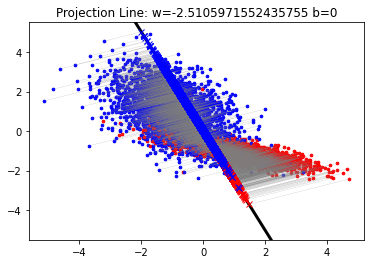

In [ ]:

m = w[1] / w[0]
c = 0;
x = np.arange(np.min(x_train), np.max(x_train))
l = m * x + c
plt.plot(x, l, color='black', linewidth=3)
# class 1 is red, class 2 is blue
plt.scatter(x_train1[:,0], x_train1[:,1], 7, color='r')
plt.scatter(x_train2[:,0], x_train2[:,1], 7, color='b')
# scatter train data
# plt.show()
plt.scatter(x_test1[:,0], x_test1[:,1], 7, color='r')
plt.scatter(x_test2[:,0], x_test2[:,1], 7, color='b')
# scatter test data
plt.ylim([-5.5, 5.5])
# plt.show()

# for class 1
x1=[]
y1=[]
for i in range(len(x_train1)):
  temp = np.dot(x_train1[i], w)
  project = w * temp + c
  x1.append(project[0])
  y1.append(project[1])
  plt.plot([x_train1[i][0], project[0]], [x_train1[i][1], project[1]], color='grey', linewidth=0.2, linestyle='--')
for i in range(len(x_test1)):
  temp = np.dot(x_test1[i], w)
  project = w * temp + c
  x1.append(project[0])
  y1.append(project[1])
  plt.plot([x_test1[i][0], project[0]], [x_test1[i][1], project[1]], color='grey', linewidth=0.2, linestyle='--')
# for class 2
x2 = []
y2 = []
for i in range(len(x_train2)):
  temp = np.dot(x_train2[i], w)
  project = w * temp + c
  x2.append(project[0])
  y2.append(project[1])
  plt.plot([x_train2[i][0], project[0]], [x_train2[i][1], project[1]], color='grey', linewidth=0.2, linestyle='--')
for i in range(len(x_test2)):
  temp = np.dot(x_test2[i], w)
  project = w * temp + c
  x2.append(project[0])
  y2.append(project[1])
  plt.plot([x_test2[i][0], project[0]], [x_test2[i][1], project[1]], color='grey', linewidth=0.2, linestyle='--')
plt.plot(x1, y1, 'rx') # red, in the shape of x
plt.plot(x2, y2, 'bx') # blue, in the shape of x

plt.title(f"Projection Line: w={m} b={c}") # 標題
plt.show()